<a href="https://colab.research.google.com/github/NehaMehtaGosavi/Analyze-stock-returns-by-earning-call-sentiment-analysis/blob/main/Churn_prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement: Predict if an individual customer will churn or not based on the telcom data set. A side question is, what are the features actually drive customer churn.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import sklearn


In [6]:
df=pd.read_csv('/content/Telecom_churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# Summary of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Checking the data type of each variable
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 r

In [7]:
df.drop(['customerID'],axis='columns',inplace=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking unique values in each column to understand the data 
for i in df.columns:
    print(i,df[i].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#convert total charges from strings to numbers
pd.to_numeric(df.TotalCharges,errors='coerce') 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
# to show null values in that column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
#df[]the inside part of bracket serves as index

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
#drop 11 rows
df1=df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#convert target variable to 0 and 1
df1['Churn'] = df1['Churn'].map({'Yes':1, 'No':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Meaning of all Variables
Dependent Variable: Churn — Whether the customer churned or not (Yes or No) 

Independent Variables: PhoneService — Whether the customer has a phone service (Yes, No)

MultipleLines — Whether the customer has multiple lines (Yes, No, No phone service)

InternetService — Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity — Whether the customer has online security (Yes, No, No internet service)

OnlineBackup — Whether the customer has online backup (Yes, No, No internet service)

DeviceProtection — Whether the customer has device protection (Yes, No, No internet service)

TechSupport — Whether the customer has tech support (Yes, No, No internet service)

StreamingTV — Whether the customer has streaming TV (Yes, No, No internet service), StreamingMovies — Whether the customer has streaming movies (Yes, No, No internet service)

Tenure — Number of months the customer has stayed with the company, Contract — The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling — Whether the customer has paperless billing (Yes, No)

PaymentMethod — The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic)
Credit card (automatic))

MonthlyCharges — The amount charged to the customer monthly

TotalCharges — The total amount charged to the customer

customerID — Customer ID

Gender — Whether the customer is a male or a female

SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)

Partner — Whether the customer has a partner or not (Yes, No)

Dependents — Whether the customer has dependents or not (Yes, No)

In [ ]:
# Checking missing values 
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#convert categorical variables into dummy variables for Correlation
churn_new_df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
churn_new_df.head()



,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.5,No,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


#### Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

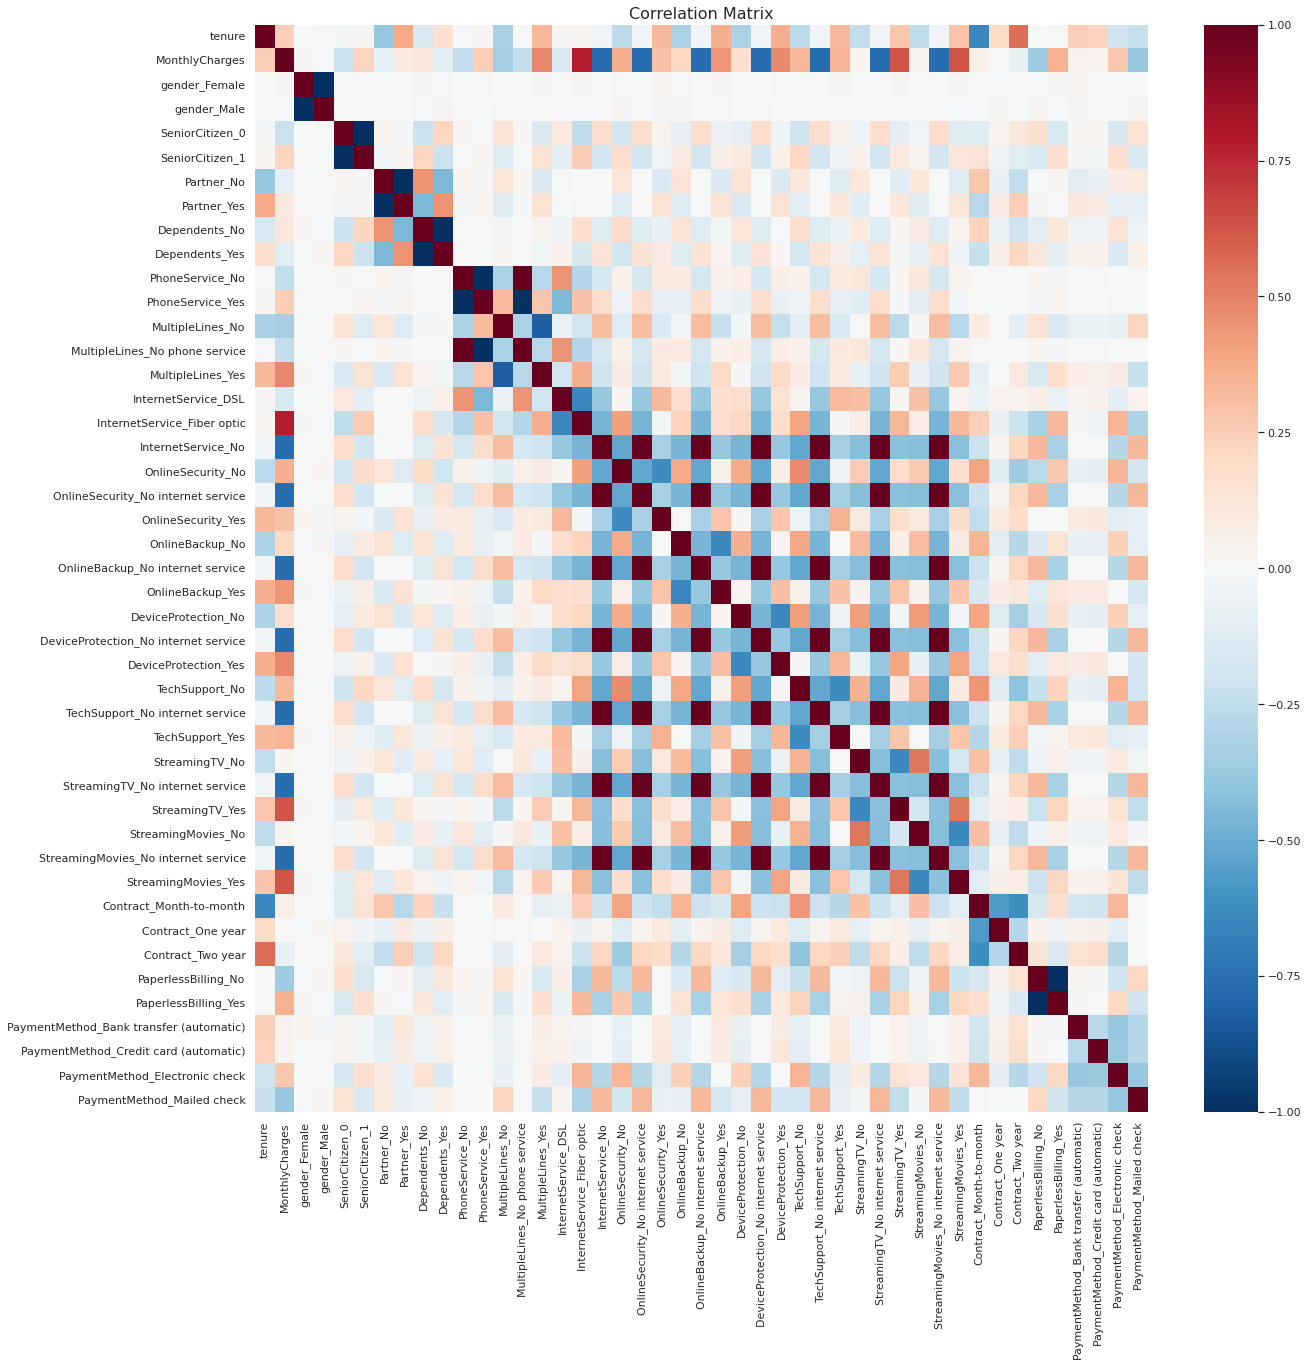

In [ ]:
# Heatmap to check the correlation between each variable 
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(churn_new_df.corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)

#### Variables that are positively correlated with churn include: Contract_month_to_month,   techsupport_No, OnlineSecurity_No. Variables that are negatively correlated with churn include: Contract_Two_Year, Tenure. 


In [ ]:
# Apply the dark_background style to all plots.
plt.style.use("seaborn-dark-palette")

#### Count for Target Variable  

In [ ]:
# Count of 0 and 1 for target variable - churn 
churn_new_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Count of 0 and 1 for target variable - churn 
churn_new_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


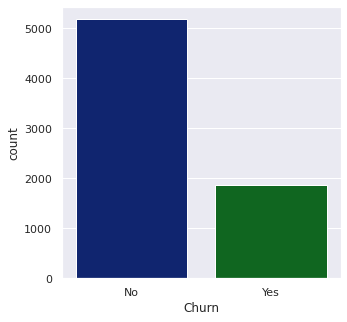

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(churn_new_df['Churn'])

#### From  the above plot we can see that there is a class imbalance of the data between churners and non-churners.

####  Variables with two classes - Exploratory Data Analysis

In [ ]:
categorical_var_two_classes=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling']

In [ ]:
# Mean of group
for i in categorical_var_two_classes:
    print(df1[[i,'Churn']].groupby([i]).mean())
    print("------------------------------------")

           Churn
gender          
Female  0.269595
Male    0.262046
------------------------------------
                  Churn
SeniorCitizen          
0              0.236503
1              0.416813
------------------------------------
            Churn
Partner          
No       0.329761
Yes      0.197171
------------------------------------
               Churn
Dependents          
No          0.312791
Yes         0.155312
------------------------------------
                 Churn
PhoneService          
No            0.250000
Yes           0.267475
------------------------------------
                     Churn
PaperlessBilling          
No                0.163757
Yes               0.335893
------------------------------------


In [ ]:
# Create a function to generate countplots:
def countplot(x, y, df1):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df1, alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

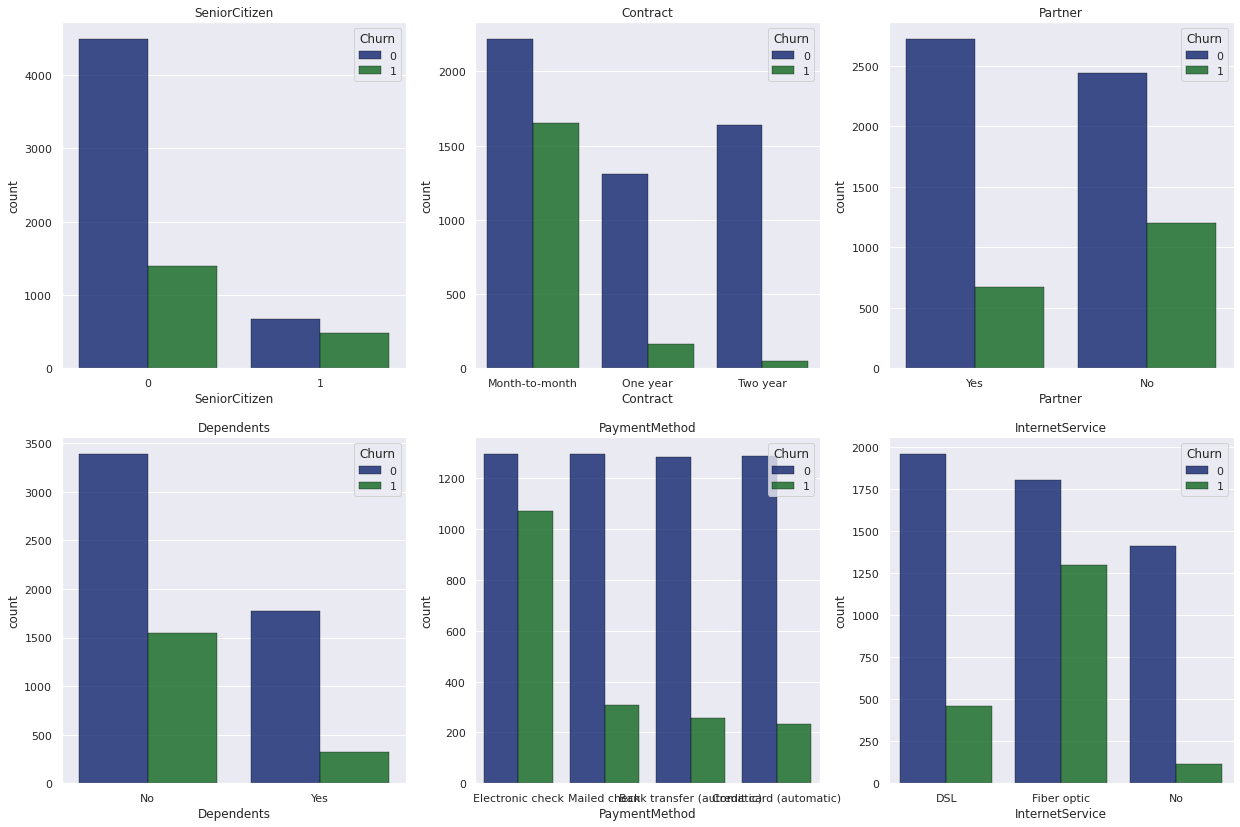

In [ ]:
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}
# Generate countplots for various features with respect to dependent Variable Churn
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df1)

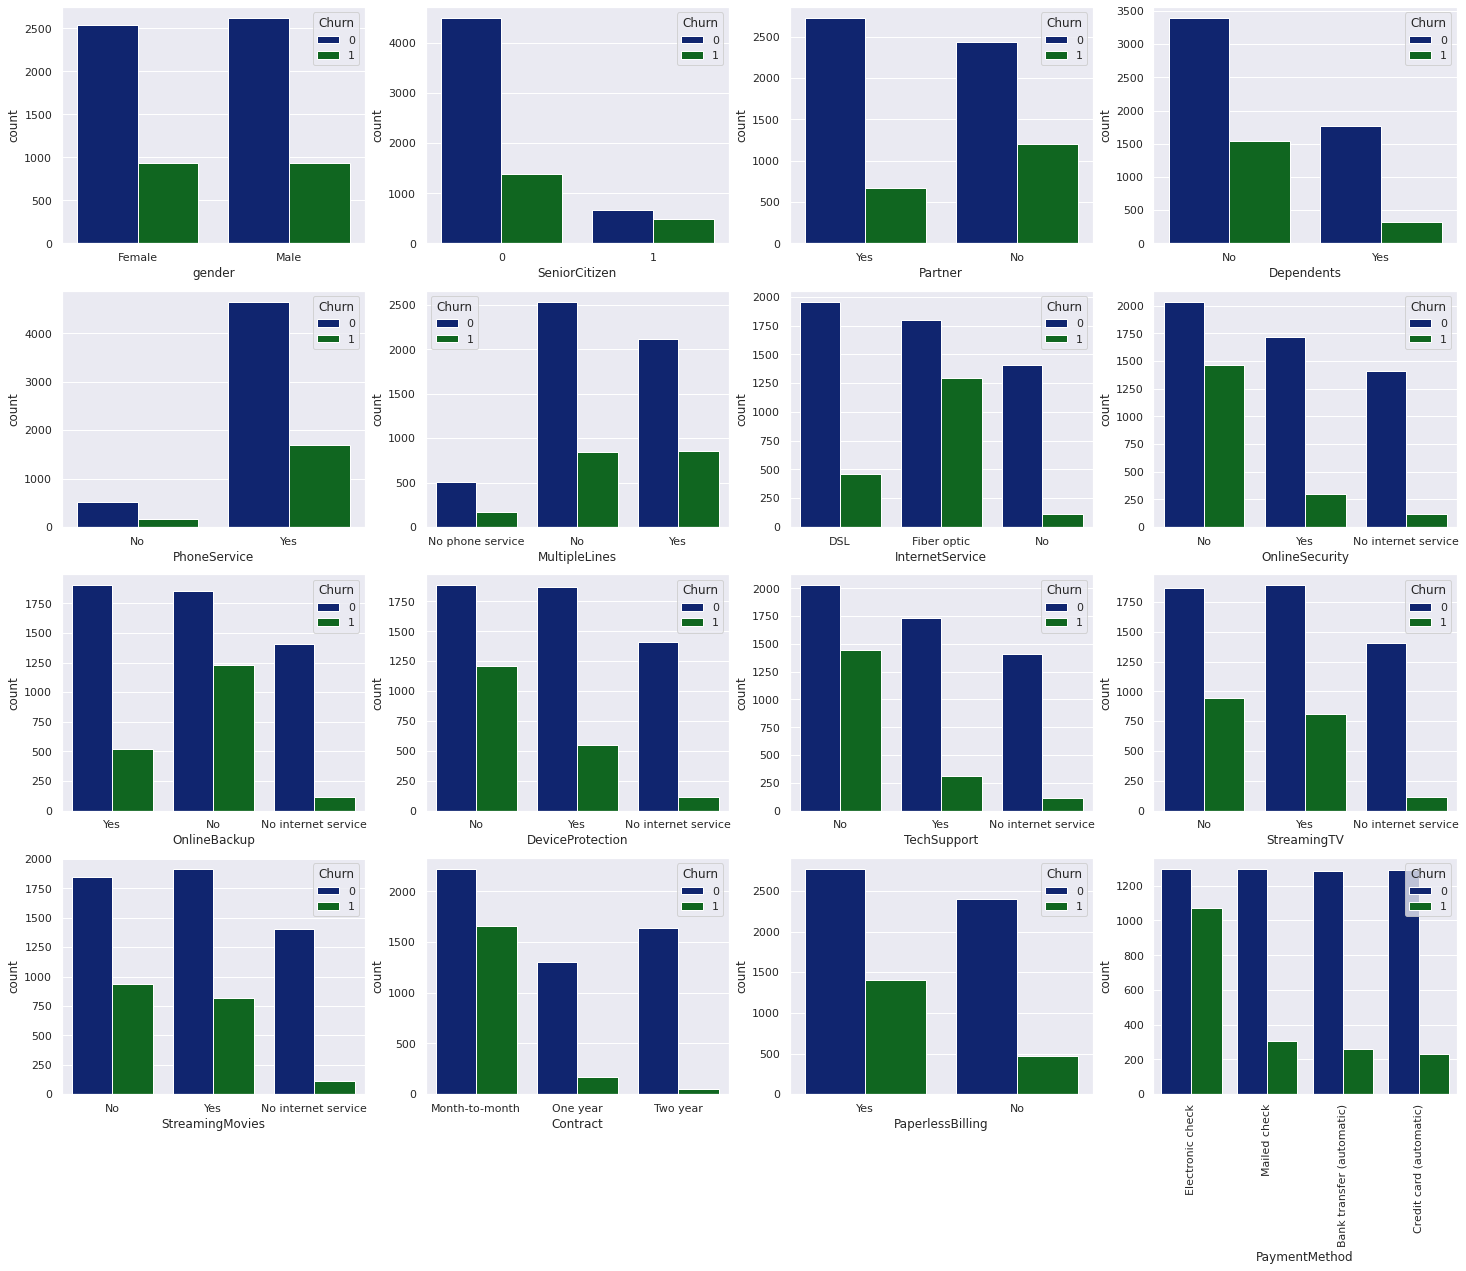

In [ ]:
# Count plot 
fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (25,20))
sns.countplot(x = "gender", hue = 'Churn', data = df1, ax=axes[0][0])
sns.countplot(x = "SeniorCitizen", hue = 'Churn', data = df1, ax=axes[0][1])
sns.countplot(x = "Partner", hue = 'Churn', data = df1, ax=axes[0][2])
sns.countplot(x = "Dependents", hue = 'Churn', data = df1, ax=axes[0][3])
sns.countplot(x = "PhoneService", hue = 'Churn', data = df1, ax=axes[1][0])
sns.countplot(x = "MultipleLines", hue = 'Churn', data = df1, ax=axes[1][1])
sns.countplot(x = "InternetService", hue = 'Churn', data = df1, ax=axes[1][2])
sns.countplot(x = "OnlineSecurity", hue = 'Churn', data = df1, ax=axes[1][3])
sns.countplot(x = "OnlineBackup", hue = 'Churn', data = df1, ax=axes[2][0])
sns.countplot(x = "DeviceProtection", hue = 'Churn', data = df1, ax=axes[2][1])
sns.countplot(x = "TechSupport", hue = 'Churn', data = df1, ax=axes[2][2])
sns.countplot(x = "StreamingTV", hue = 'Churn', data = df1, ax=axes[2][3])
sns.countplot(x = "StreamingMovies", hue = 'Churn', data = df1, ax=axes[3][0])
sns.countplot(x = "Contract", hue = 'Churn', data = df1, ax=axes[3][1])
sns.countplot(x = "PaperlessBilling", hue = 'Churn', data = df1, ax=axes[3][2])
ax = sns.countplot(x = "PaymentMethod", hue = 'Churn', data = df1, ax=axes[3][3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

#### Inference from the Countplots:

From the above countplots below are the observations:
1. Senior citizen has higher churn rate than non senior citizens. 
2. The variable contract has higher churn rate for month-to-month contracts than other contract durations.
3. Customers who have partners have higher churn rate than customers without partners.
4. Higher churn rate for customers without children.
5. Payment method mailed check has little higher churn rate than other payment methods.
6. Customers with internet service DSL has higher churn rate than other internet services.

Text(0.5, 1.0, '% of Gender')

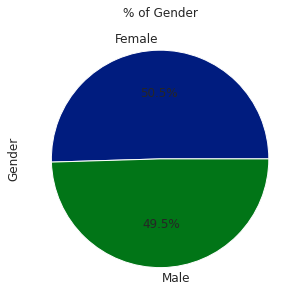

In [ ]:
# Pie chart 
import matplotlib.ticker as mtick
ax = (df1['gender'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['Female', 'Male'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% of Gender', fontsize = 12)

#### From the above pie chart we can clearly see that female customers are more than male customres but it doesn't have big difference approximately 0.5% male customers are more than female one.



In [ ]:
import plotly.express as px

# which gender has more churn rate
fig = px.histogram(data_frame = df1,
             x = "gender",
             color="Churn", title="<b>Gender vs Churn</b>",
             template='ggplot2')
fig.show()

#### There is a slight difference in churning rate for gender: Female count is 939 and male count for churn is 930 which is approximately 1%

Text(0.5, 1.0, '% of SeniorCitizen')

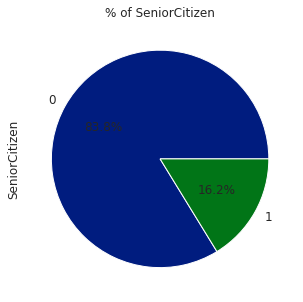

In [ ]:
# Pie chart 
import matplotlib.ticker as mtick
ax = (df1['SeniorCitizen'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = [0, 1],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('SeniorCitizen',fontsize = 12)
ax.set_title('% of SeniorCitizen', fontsize = 12)

#### Most of the customers are not SeniorCitizen.



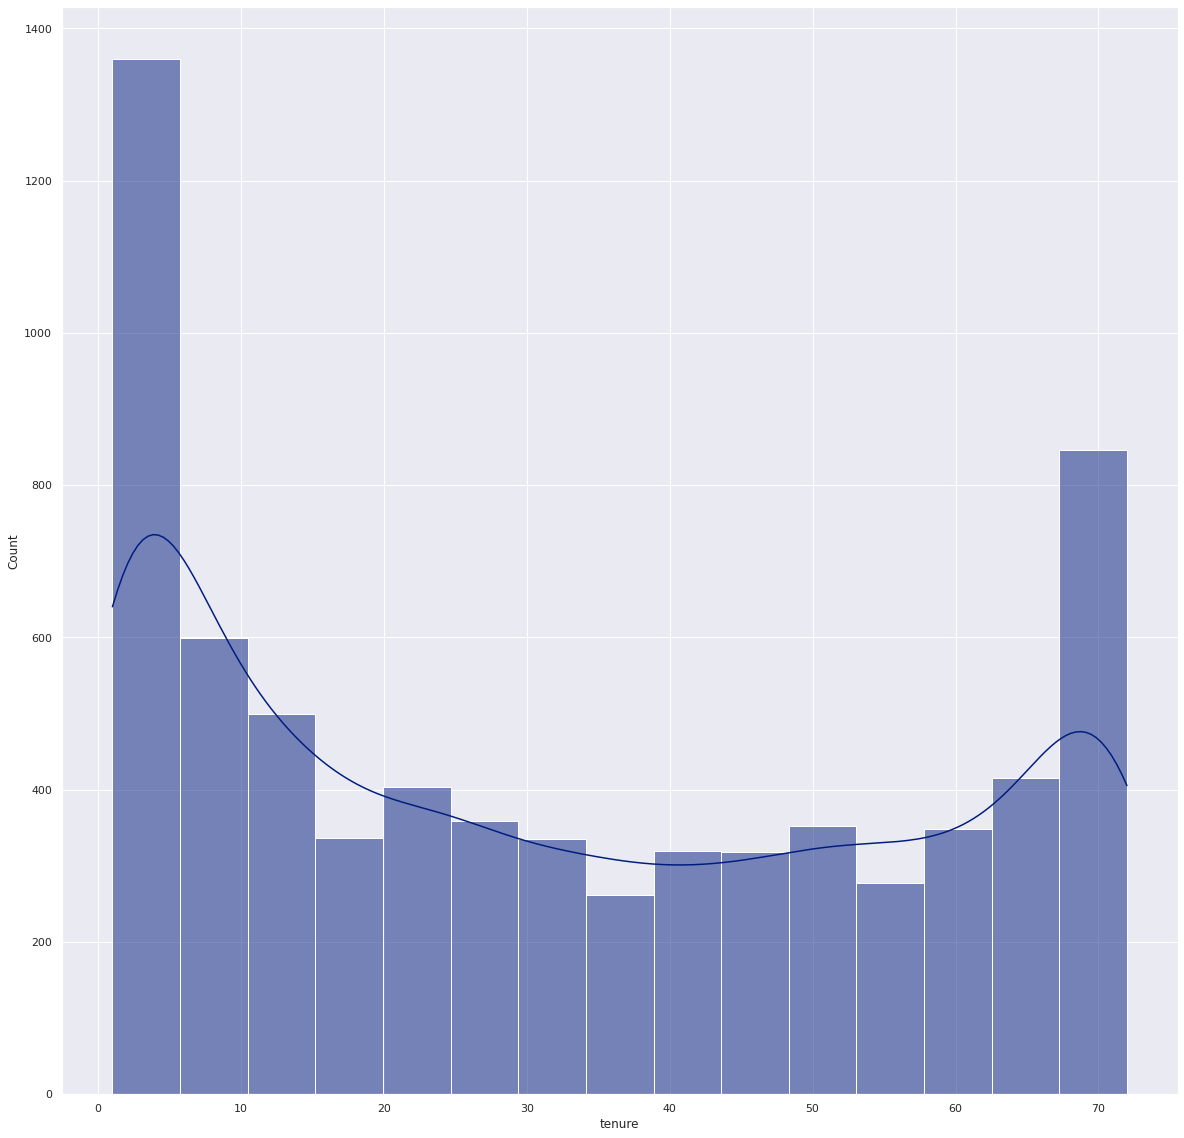

In [ ]:
# Exploring Numerical Values
sns.histplot(x = df1['tenure'],kde = True)
plt.show()

####  From the above histoplot we can see that most of the customers have tenure between 0-5 months.

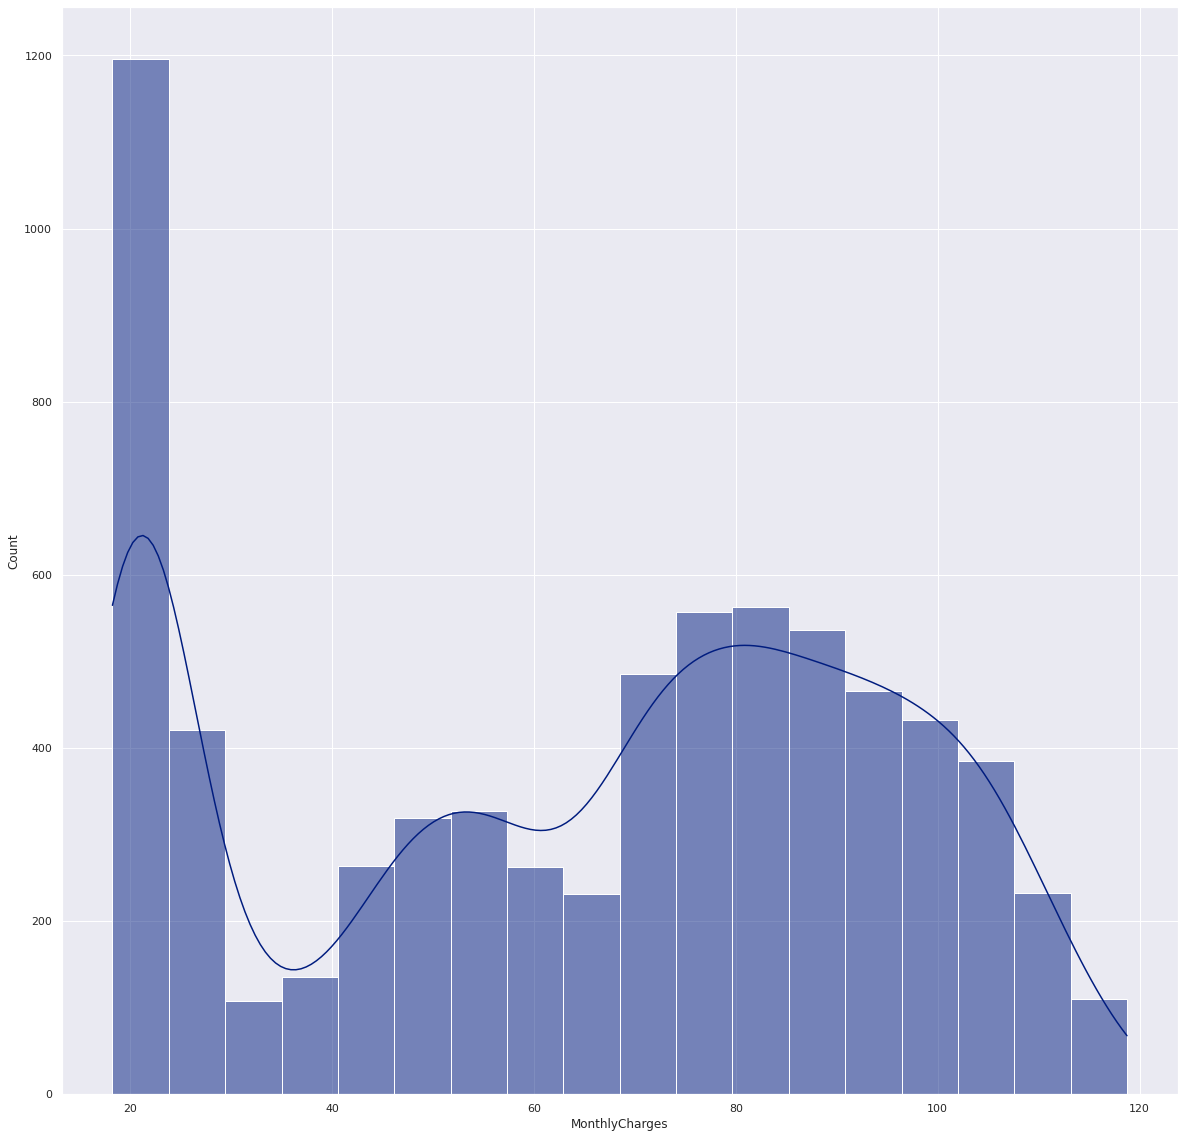

In [ ]:
# Exploring Numerical Values
sns.histplot(x = df1['MonthlyCharges'],kde = True)
plt.show()

#### Most of the customers having Monthly charges in between 20-25



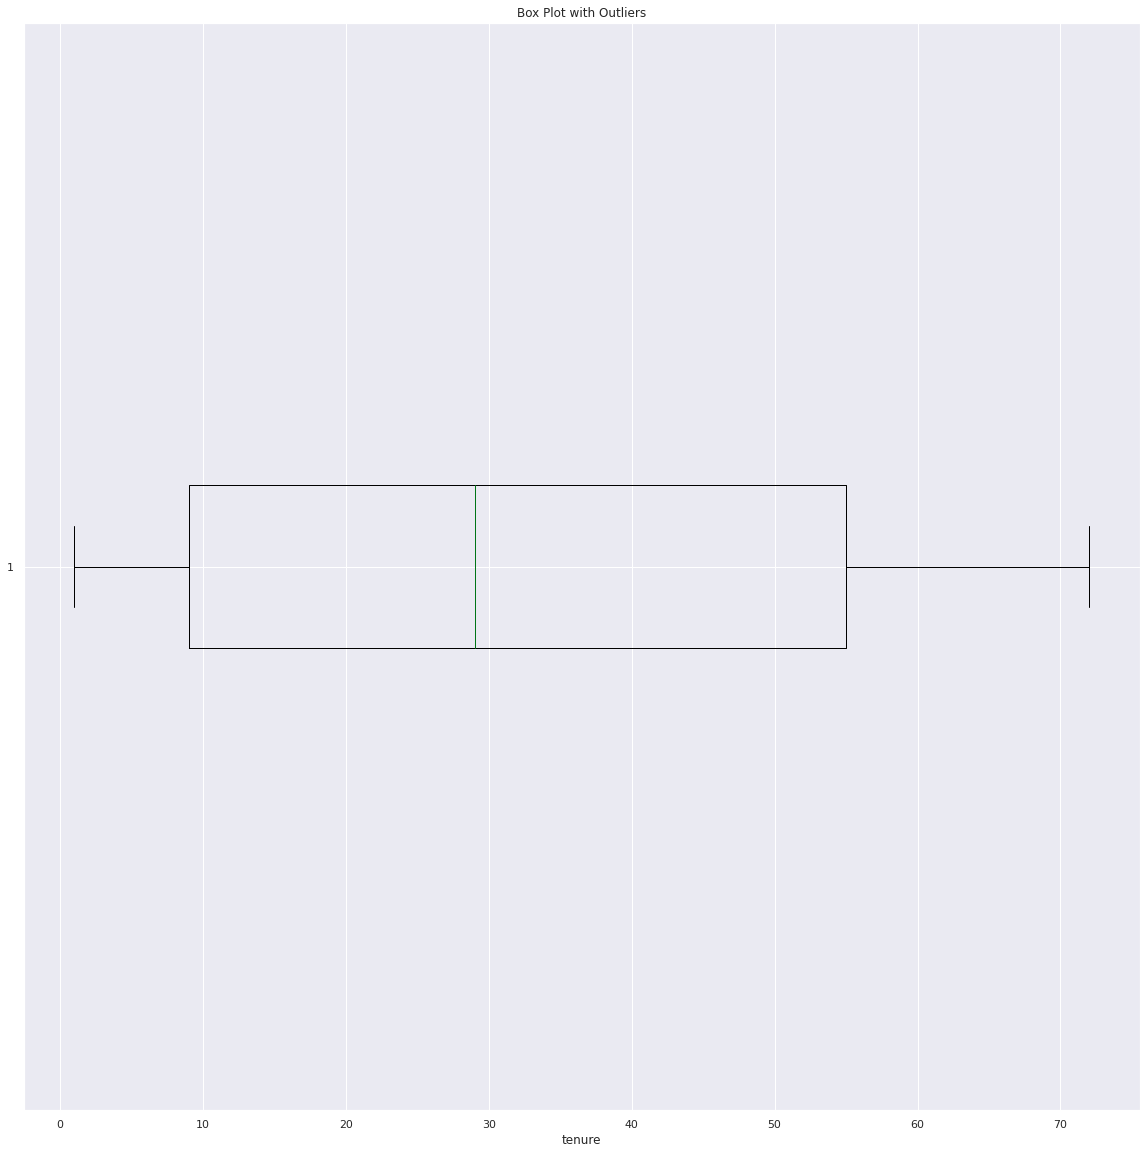

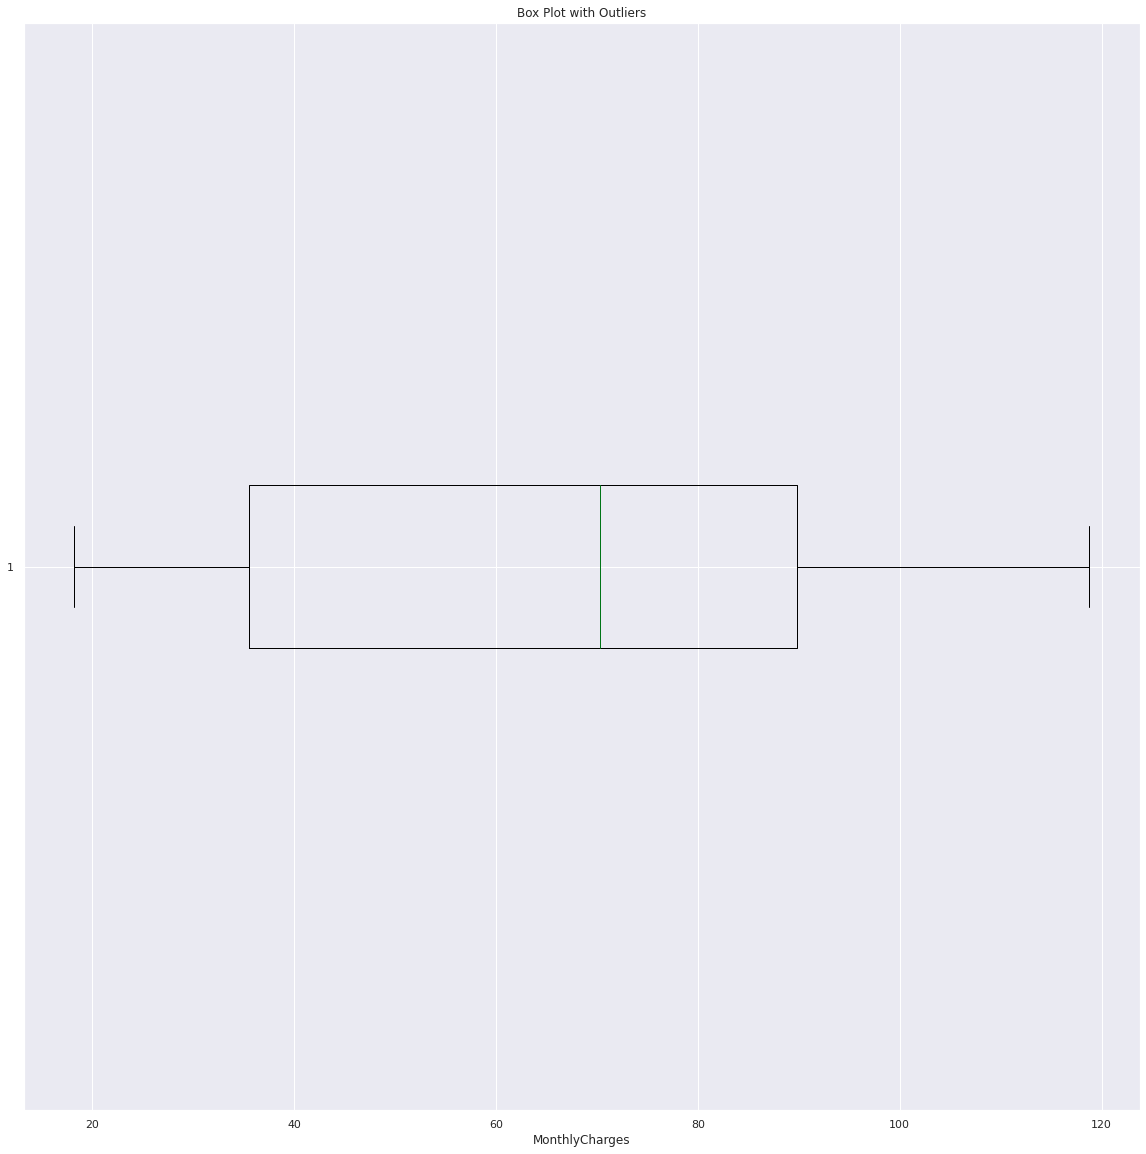

In [ ]:
#Check for Outliers for continous variables

# Boxplot to check outliers for Tenure
plt.boxplot(df1['tenure'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot with Outliers")
plt.xlabel("tenure")
plt.show()

# Boxplot to check outliers for Monthly Charges
plt.boxplot(df1['MonthlyCharges'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot with Outliers")
plt.xlabel("MonthlyCharges")
plt.show()



#### From the boxplot, we can see that there is no outliers found in numerical features.

####  Feature Engineering : 
1. Drop unnecessary column
2. One hot encoding



In [16]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [18]:
print_unique_column_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [19]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
print_unique_column_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
#convert yes and no to 1 and 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [22]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
# for only 2 categories no need to perform one hot encoding

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
df1['gender'].unique()

array([1, 0])

In [25]:
#performing one hot encoding on columns with more than 2 categories
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.head(3)
#10 new columns created

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1


In [26]:
df2.dtypes
#all values converted to numbers

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
#convert remaining values in range(0,1)
cols_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_scale]=scaler.fit_transform(df2[cols_scale])

In [ ]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1


In [28]:
# Creating new dataframe with selected features 
df2= df2.drop(['gender','SeniorCitizen','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','InternetService_Fiber optic',
              'Contract_One year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
              'PaymentMethod_Mailed check'],axis ='columns')
df2.head()

,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
0,1,0,0.000000,1,0.115423,0.001275,0,1,0,1,0,1
1,0,0,0.464789,0,0.385075,0.215867,0,1,0,0,0,0
2,0,0,0.014085,1,0.354229,0.010310,1,1,0,1,0,0
3,0,0,0.619718,0,0.239303,0.210241,0,1,0,0,0,0
4,0,0,0.014085,1,0.521891,0.015330,1,0,0,1,0,1


#### Splitting the data in two parts ( Train and Test in a ratio of 80:20)

In [29]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 11)

In [32]:
X_test.shape

(1407, 11)

In [33]:
len(X_train.columns)

11

# Model 1: Logistic Regression

In [61]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [62]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## Evaluating Model Performance

In [63]:
#training set performance

# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    6328
1    1932
Name: Churn, dtype: int64
----------------------------------
0    0.766102
1    0.233898
Name: Churn, dtype: float64


#### Train Set Results:
4544 Correct (1081 Incorrect)
80.1 % Accuracy

In [64]:
#Test set performance
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1595
1     471
Name: Churn, dtype: int64
---------------------------------
0    0.772023
1    0.227977
Name: Churn, dtype: float64


#### Test Set Results:
1098 Correct (209 Incorrect)
78 % Accuracy

In [65]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[735, 295],
       [176, 860]])

In [66]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

In [67]:
# Displaying the results
import pandas as pd

d = [ ["Precision", precision_train, precision_test],
     ["Recall", recall_train, recall_test],
     ["Accuracy", accuracy_train, accuracy_test],
     ["f-score", f1_train, f1_test]]

metrics = pd.DataFrame(d, columns = ['Metrics','Train','Test'])
print(metrics)

     Metrics     Train      Test
0  Precision  0.738951  0.744589
1     Recall  0.822389  0.830116
2   Accuracy  0.766102  0.772023
3    f-score  0.778440  0.785030


# Model 2 : Decision Tree

In [ ]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X=df2.drop('Churn',axis='columns')
y=df2.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
clf = DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of Decision Tree classifier: {:.2f}'
     .format(clf.score(X_train,y_train)))
# testing the accuracy on test data
print('Accuracy of Decision Tree classifier for test data: {:.2f}'
     .format(clf.score(X_test,y_test)))


Accuracy of Decision Tree classifier: 1.00
Accuracy of Decision Tree classifier for test data: 0.74


#### With all independent variables into account, the accuracy for the decision tree to classify the Customer who Churn is 74%. To improve the model further, Random Forest is created.

# Model 3: Random Forest

In [ ]:
# Random Forest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
churnmodel_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
churnmodel_rf.fit(X_train, y_train)



RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

#### The accuracy for Random Forest is 81% which is better than the decision Tree. The reason to this is that Random Forest builds the model basis the variables that has higher weight/ importance in classifying the dependant variable.

<AxesSubplot:>

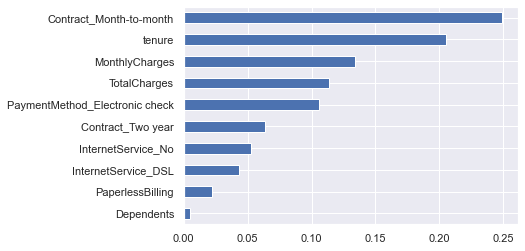

In [ ]:
## Top 10 most important variables affecting the Churning
importances = churnmodel_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### From the above plot for Random Forest, tenure and Contract_Month_to_month are the most important variables to classify the Customer Churn.

# Model 4 : KNN

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Classification using KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
## Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[923 129]
 [175 180]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1052
           1       0.58      0.51      0.54       355

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.78      0.78      0.78      1407



#### The above Confusion Matrix for KNN classification shows 78% overall accuracy to classify the Churn. The precision and recall for Churn = yes is lower than those for Churn = No which signifies that this model has better accuracy to classify the customers who donot Churn.

Text(0, 0.5, 'Mean Error')

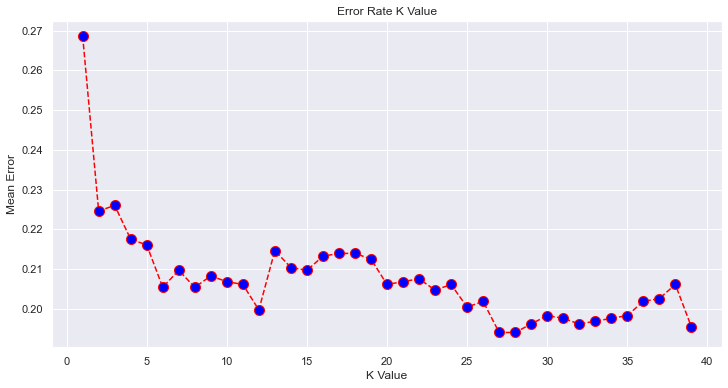

In [ ]:
# Finding the best K value basis error rate
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# plotting the k-value graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From above plot, for K=27 the mean error is lowest for the train data . Further with this K value, model accuracy is calculated.

In [ ]:
# Classifying with K=27
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[946 106]
 [167 188]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.64      0.53      0.58       355

    accuracy                           0.81      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



For K=27, the model overall accuracy is increased to 81%. Also, the precision and recall is improved.

Best Model with Selected Feature Dataset: Random Forest , KNN with K=27

# MODEL 5: ANN

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
model=keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100)



Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5882 - accuracy: 0.6749
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7570
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7599
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7605
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7604
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7599
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7633
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7632
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7644
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4854 - accura

### Model evaluation

In [70]:
#Accuracy

print(max(history.history['accuracy']))

0.7688862085342407


In [71]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7788


[0.4650940001010895, 0.7787995934486389]

In [72]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [73]:
#training set performance

# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    6328
1    1932
Name: Churn, dtype: int64
----------------------------------
0    0.766102
1    0.233898
Name: Churn, dtype: float64


In [74]:
#Test set performance
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1595
1     471
Name: Churn, dtype: int64
---------------------------------
0    0.772023
1    0.227977
Name: Churn, dtype: float64


In [75]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[735, 295],
       [176, 860]])

In [76]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

In [77]:
# Displaying the results
import pandas as pd

d = [ ["Precision", precision_train, precision_test],
     ["Recall", recall_train, recall_test],
     ["Accuracy", accuracy_train, accuracy_test],
     ["f-score", f1_train, f1_test]]

metrics = pd.DataFrame(d, columns = ['Metrics','Train','Test'])
print(metrics)

     Metrics     Train      Test
0  Precision  0.738951  0.744589
1     Recall  0.822389  0.830116
2   Accuracy  0.766102  0.772023
3    f-score  0.778440  0.785030


# OVERSAMPLING

In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_oversample,y_oversample = smote.fit_resample(X,y)

#### As discussed earlier, the data is imbalanced with 73% of the records for Customers who stay with the company(Churn = No). With this there is higher probability that the models are biased and thus have lower accuracy. To get rid of this, Oversampling is done with 'SMOTE'by duplicating the records for Churn = Yes

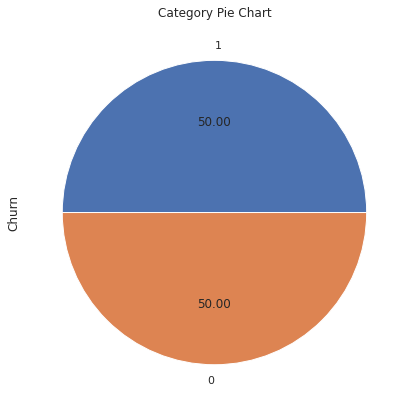

1    5163
0    5163
Name: Churn, dtype: int64

In [79]:
plt.figure(figsize=(7,7))
y_oversample.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Category Pie Chart')
plt.show()
y_oversample.value_counts()

The above pie Chart shows that the the new Dataset has same number of records(5174) for both Churn = Yes and Churn = No.

In [80]:
# TraX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)in and Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=101)

## KNN model perfomrmance on oversampled data

In [ ]:
## KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Classification using KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
## Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1136  416]
 [ 213 1333]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1552
           1       0.76      0.86      0.81      1546

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



#### From oversampling, the KNN Model overall accuracy is decreased to 80% from 78% as seen in the imbalanced dataset. Also, the recall and precision values are now balanced for Churn = 1 which was quite low for the imbalanced dataset. This means his model has better accuracy to classify the customers who Churn the company and is very important from Business perspective.

Text(0, 0.5, 'Mean Error')

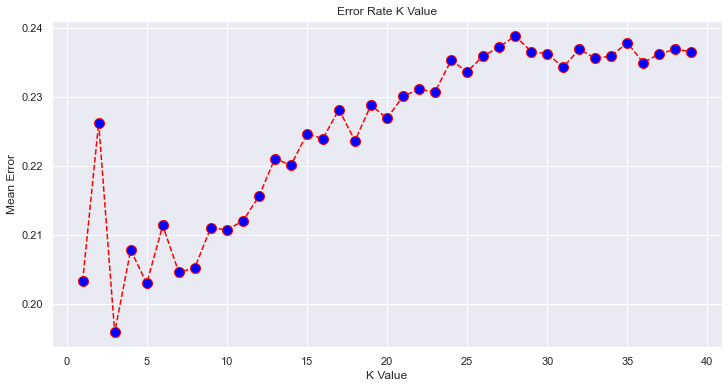

In [ ]:
# Finding the best K value basis error rate
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

# plotting the k-value graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. From above plot, for K=7 the mean error is relatively lowest for the train data. Further with this K value, model accuracy is calculated.

In [ ]:
# Classifying with K=7
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1158  394]
 [ 213 1333]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1552
           1       0.77      0.86      0.81      1546

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



For K=7, the model overall accuracy is  80%.

## Random Forest  performance on the over sampled data

In [ ]:
# Random Forest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
churnmodel_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
churnmodel_rf.fit(X_train, y_train)




RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [ ]:
# Make predictions
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

[[769 261]
 [171 865]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1030
           1       0.77      0.83      0.80      1036

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



The accuracy for Random Forest is 79% for the Oversampled Data.

## ANN Performance of oversampled data

In [81]:
model=keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100)



Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.6588
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7489
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7525
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7561
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7546
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7579
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7576
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7582
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7604
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4914 - accura

In [54]:
# Performance evaluation

In [82]:
#accuracy
print(max(history.history['accuracy']))

0.7697336673736572


In [83]:
#predictions
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7696


[0.4701188802719116, 0.7696030735969543]

In [84]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [85]:
#training set performance

# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    6288
1    1972
Name: Churn, dtype: int64
----------------------------------
0    0.761259
1    0.238741
Name: Churn, dtype: float64


In [86]:
#Test set performance
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1575
1     491
Name: Churn, dtype: int64
---------------------------------
0    0.762343
1    0.237657
Name: Churn, dtype: float64


In [87]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[735, 295],
       [196, 840]])

In [88]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

In [89]:
# Displaying the results
import pandas as pd

d = [ ["Precision", precision_train, precision_test],
     ["Recall", recall_train, recall_test],
     ["Accuracy", accuracy_train, accuracy_test],
     ["f-score", f1_train, f1_test]]

metrics = pd.DataFrame(d, columns = ['Metrics','Train','Test'])
print(metrics)

     Metrics     Train      Test
0  Precision  0.736657  0.740088
1     Recall  0.812697  0.810811
2   Accuracy  0.761259  0.762343
3    f-score  0.772811  0.773837
